In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(39.24088350477214, -66.05896038906894),
 (-28.980256862159088, -167.79613461000636),
 (-44.09156786528829, -53.229410697214675),
 (38.86733911064073, 97.34564963222232),
 (-52.41995069381695, 133.7954406387118),
 (32.24967303967374, 108.50350073870203),
 (21.62702290921912, 65.54852082287152),
 (-85.18997203247326, -151.77853102497727),
 (-15.513564187230202, -104.96666394857185),
 (73.83171565248014, 128.28935243158776),
 (42.97118488440435, 64.8931408181717),
 (72.07588594079928, 55.08732605370949),
 (46.97191188455639, -61.122075883972684),
 (8.385503259050026, -50.35567057306099),
 (-54.52141227709067, 89.04859267971523),
 (67.66482211254547, -96.71789987480243),
 (-2.680459833887781, 37.947368818790835),
 (56.275514061643946, 23.429117124813814),
 (-39.333008459732696, 44.61446971851228),
 (41.630225900249684, -44.97815429455571),
 (-14.417830716020717, 53.30170466151981),
 (27.946153011744755, -151.07764856846322),
 (-70.54916171517448, 31.11057382113654),
 (-56.520161693592485

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

743

In [5]:
#5. Perform an API call with the OpenWeatherMap.

#Import dependencies (requests)
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

#import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
        
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_weather_des = city_weather["weather"][0]["description"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Current Description": city_weather_des,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 15 | nantucket
Processing Record 2 of Set 15 | alofi
Processing Record 3 of Set 15 | mar del plata
Processing Record 4 of Set 15 | yumen
Processing Record 5 of Set 15 | portland
Processing Record 6 of Set 15 | ankang
Processing Record 7 of Set 15 | keti bandar
Processing Record 8 of Set 15 | mataura
Processing Record 9 of Set 15 | puerto ayora
Processing Record 10 of Set 15 | tiksi
Processing Record 11 of Set 15 | tasbuget
City not found. Skipping...
Processing Record 12 of Set 15 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 15 | inverness
Processing Record 14 of Set 15 | kourou
Processing Record 15 of Set 15 | busselton
Processing Record 16 of Set 15 | thompson
Processing Record 17 of Set 15 | taveta
Processing Record 18 of Set 15 | joniskis
Processing Record 19 of Set 15 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 15 | torbay
Processing Record 21 of

Processing Record 34 of Set 18 | hasaki
Processing Record 35 of Set 18 | de aar
Processing Record 36 of Set 18 | vao
Processing Record 37 of Set 18 | iqaluit
Processing Record 38 of Set 18 | aflu
City not found. Skipping...
Processing Record 39 of Set 18 | bonthe
Processing Record 40 of Set 18 | carnarvon
Processing Record 41 of Set 18 | sidi ali
Processing Record 42 of Set 18 | mount gambier
Processing Record 43 of Set 18 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 18 | wagga wagga
Processing Record 45 of Set 18 | provideniya
Processing Record 46 of Set 18 | vila velha
Processing Record 47 of Set 18 | tallahassee
Processing Record 48 of Set 18 | langham
Processing Record 49 of Set 18 | mayumba
Processing Record 50 of Set 18 | mirnyy
Processing Record 1 of Set 19 | navahrudak
Processing Record 2 of Set 19 | puri
Processing Record 3 of Set 19 | hualmay
Processing Record 4 of Set 19 | front royal
Processing Record 5 of Set 19 | janauba
Processing Record 6 of Se

Processing Record 21 of Set 22 | alpena
Processing Record 22 of Set 22 | teeli
Processing Record 23 of Set 22 | geraldton
Processing Record 24 of Set 22 | eureka
Processing Record 25 of Set 22 | playas
Processing Record 26 of Set 22 | rudnogorsk
Processing Record 27 of Set 22 | dolbeau
City not found. Skipping...
Processing Record 28 of Set 22 | tessalit
Processing Record 29 of Set 22 | mehamn
Processing Record 30 of Set 22 | kununurra
Processing Record 31 of Set 22 | codrington
Processing Record 32 of Set 22 | sernovodsk
Processing Record 33 of Set 22 | zeya
Processing Record 34 of Set 22 | sao joao da barra
Processing Record 35 of Set 22 | general roca
Processing Record 36 of Set 22 | durusu
Processing Record 37 of Set 22 | deputatskiy
Processing Record 38 of Set 22 | kirakira
Processing Record 39 of Set 22 | urengoy
Processing Record 40 of Set 22 | kruisfontein
Processing Record 41 of Set 22 | toktogul
Processing Record 42 of Set 22 | aykhal
Processing Record 43 of Set 22 | kapoeta


Processing Record 9 of Set 26 | churapcha
Processing Record 10 of Set 26 | whitehorse
Processing Record 11 of Set 26 | gurgan
City not found. Skipping...
Processing Record 12 of Set 26 | paracuru
Processing Record 13 of Set 26 | nyurba
Processing Record 14 of Set 26 | male
Processing Record 15 of Set 26 | namibe
Processing Record 16 of Set 26 | porto novo
Processing Record 17 of Set 26 | berdigestyakh
Processing Record 18 of Set 26 | krutinka
Processing Record 19 of Set 26 | aksu
Processing Record 20 of Set 26 | tazovskiy
Processing Record 21 of Set 26 | mookane
Processing Record 22 of Set 26 | bani walid
Processing Record 23 of Set 26 | preobrazheniye
Processing Record 24 of Set 26 | kavaratti
Processing Record 25 of Set 26 | nouadhibou
Processing Record 26 of Set 26 | buchanan
Processing Record 27 of Set 26 | acarau
Processing Record 28 of Set 26 | benjamin hill
Processing Record 29 of Set 26 | boende
Processing Record 30 of Set 26 | sao filipe
Processing Record 31 of Set 26 | chired

In [8]:
#7. Add the data to a new DataFrame.
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description,Date
0,Nantucket,41.2835,-70.0995,71.96,94,20,12.66,US,few clouds,2021-09-25 02:42:23
1,Alofi,-19.0595,-169.9187,75.09,83,27,10.36,NU,light rain,2021-09-25 02:39:25
2,Mar Del Plata,-38.0023,-57.5575,55.13,59,0,1.99,AR,clear sky,2021-09-25 02:34:50
3,Yumen,40.2833,97.2000,57.97,40,9,15.93,CN,clear sky,2021-09-25 02:46:32
4,Portland,45.5234,-122.6762,81.18,42,1,1.01,US,clear sky,2021-09-25 02:36:17
5,Ankang,32.6800,109.0172,81.82,74,96,3.15,CN,light rain,2021-09-25 02:46:32
6,Keti Bandar,24.1447,67.4497,84.38,76,78,6.02,PK,broken clouds,2021-09-25 02:46:33
7,Mataura,-46.1927,168.8643,47.48,86,96,10.71,NZ,light rain,2021-09-25 02:38:24
8,Puerto Ayora,-0.7393,-90.3518,69.55,89,86,5.70,EC,overcast clouds,2021-09-25 02:38:14
9,Tiksi,71.6872,128.8694,33.89,76,100,20.69,RU,overcast clouds,2021-09-25 02:39:09


In [34]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nantucket,US,2021-09-25 02:42:23,41.2835,-70.0995,71.96,94,20,12.66
1,Alofi,NU,2021-09-25 02:39:25,-19.0595,-169.9187,75.09,83,27,10.36
2,Mar Del Plata,AR,2021-09-25 02:34:50,-38.0023,-57.5575,55.13,59,0,1.99
3,Yumen,CN,2021-09-25 02:46:32,40.2833,97.2000,57.97,40,9,15.93
4,Portland,US,2021-09-25 02:36:17,45.5234,-122.6762,81.18,42,1,1.01
...,...,...,...,...,...,...,...,...,...
682,Strezhevoy,RU,2021-09-25 02:48:45,60.7333,77.5889,33.78,89,98,9.82
683,Lima,PE,2021-09-25 02:47:22,-12.0432,-77.0282,59.25,82,90,9.22
684,Kolomna,RU,2021-09-25 02:48:45,55.0794,38.7783,44.85,88,57,6.11
685,Muriwai Beach,NZ,2021-09-25 02:48:46,-36.8167,174.4500,65.79,70,19,9.80


In [10]:
# Create the output file (CSV).
# output_data_file = "weather_data/cities.csv"
output_data_file = "weather_data/WeatherPy_Database.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
import time
today = time.strftime("%x")
today

'09/24/21'

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1632538181.8765662

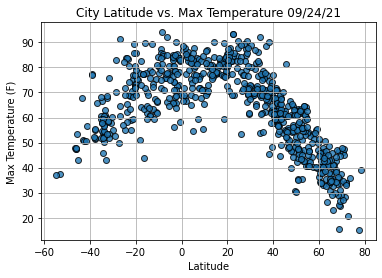

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

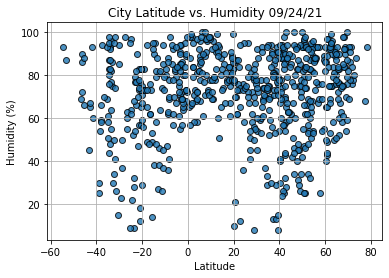

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

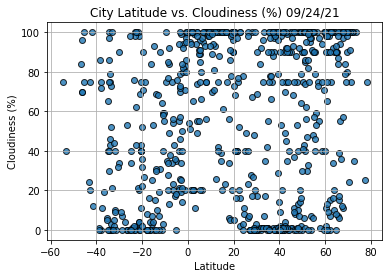

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

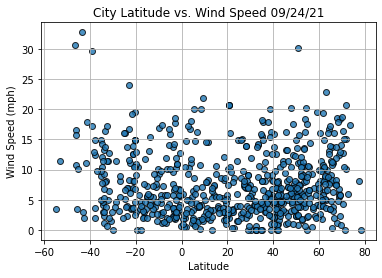

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                     Thompson
Country                        CA
Date          2021-09-25 02:35:01
Lat                       55.7435
Lng                      -97.8558
Max Temp                    42.96
Humidity                       93
Cloudiness                     90
Wind Speed                  10.36
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
682     True
683    False
684     True
685    False
686     True
Name: Lat, Length: 687, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nantucket,US,2021-09-25 02:42:23,41.2835,-70.0995,71.96,94,20,12.66
3,Yumen,CN,2021-09-25 02:46:32,40.2833,97.2000,57.97,40,9,15.93
4,Portland,US,2021-09-25 02:36:17,45.5234,-122.6762,81.18,42,1,1.01
5,Ankang,CN,2021-09-25 02:46:32,32.6800,109.0172,81.82,74,96,3.15
6,Keti Bandar,PK,2021-09-25 02:46:33,24.1447,67.4497,84.38,76,78,6.02
...,...,...,...,...,...,...,...,...,...
680,Siguiri,GN,2021-09-25 02:48:45,11.6667,-9.5000,70.43,93,100,8.32
681,Bacolod,PH,2021-09-25 02:48:45,10.6667,122.9500,86.40,72,99,7.92
682,Strezhevoy,RU,2021-09-25 02:48:45,60.7333,77.5889,33.78,89,98,9.82
684,Kolomna,RU,2021-09-25 02:48:45,55.0794,38.7783,44.85,88,57,6.11


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nantucket,US,2021-09-25 02:42:23,41.2835,-70.0995,71.96,94,20,12.66
3,Yumen,CN,2021-09-25 02:46:32,40.2833,97.2000,57.97,40,9,15.93
4,Portland,US,2021-09-25 02:36:17,45.5234,-122.6762,81.18,42,1,1.01
5,Ankang,CN,2021-09-25 02:46:32,32.6800,109.0172,81.82,74,96,3.15
6,Keti Bandar,PK,2021-09-25 02:46:33,24.1447,67.4497,84.38,76,78,6.02


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

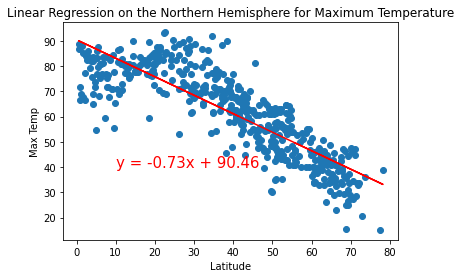

<Figure size 432x288 with 0 Axes>

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))
# Save the figure.
plt.savefig("weather_data/Fig5.png")


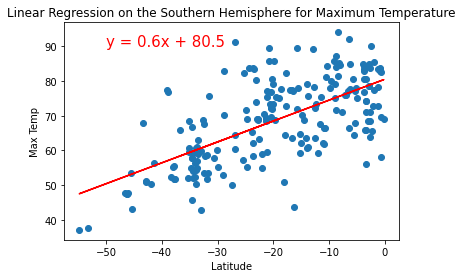

<Figure size 432x288 with 0 Axes>

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))
# Save the figure.
plt.savefig("weather_data/Fig6.png")

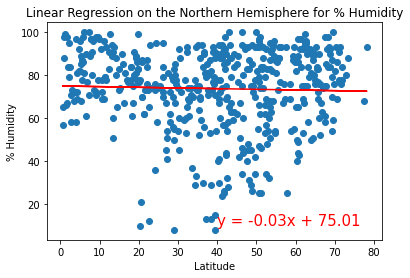

<Figure size 432x288 with 0 Axes>

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))
# Save the figure.
plt.savefig("weather_data/Fig7.png")

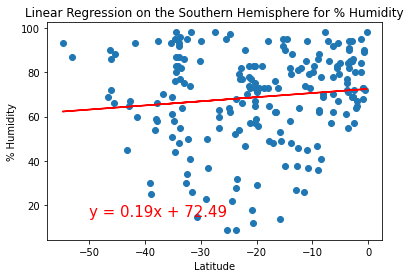

<Figure size 432x288 with 0 Axes>

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))
# Save the figure.
plt.savefig("weather_data/Fig8.png")

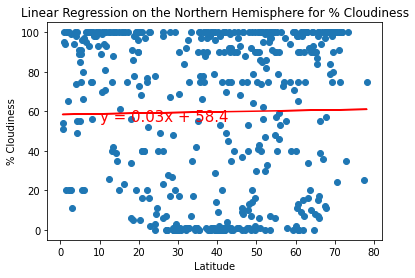

<Figure size 432x288 with 0 Axes>

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))
# Save the figure.
plt.savefig("weather_data/Fig9.png")

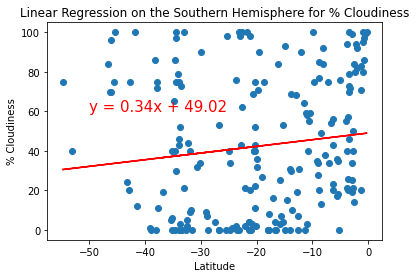

<Figure size 432x288 with 0 Axes>

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))
# Save the figure.
plt.savefig("weather_data/Fig10.png")

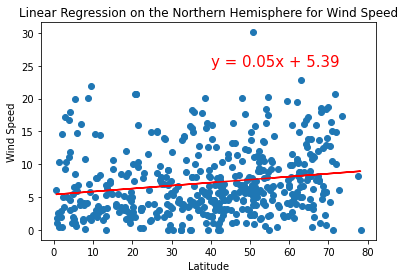

<Figure size 432x288 with 0 Axes>

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))
# Save the figure.
plt.savefig("weather_data/Fig11.png")

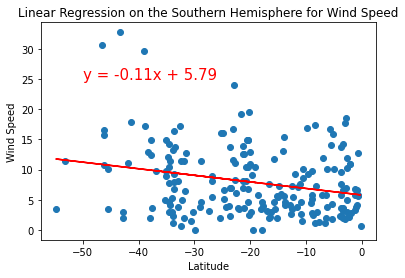

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))
# Save the figure.
plt.savefig("weather_data/Fig12.png")